In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load data
data = pd.read_csv("task2.csv")

In [4]:
# Preprocess text
data["Generation"] = data["Generation"].str.lower()
data["Generation"] = data["Generation"].str.replace("[^\w\s]", "")
data["Generation"] = data["Generation"].str.replace("\d+", "")
data["Generation"] = data["Generation"].str.strip()
data["Generation"] = data["Generation"].str.split()

<ipython-input-4-b715872c4ca9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Generation"] = data["Generation"].str.replace("[^\w\s]", "")
<ipython-input-4-b715872c4ca9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Generation"] = data["Generation"].str.replace("\d+", "")


In [5]:
# Remove stop words
stop_words = set(stopwords.words('english'))
data["Generation"] = data["Generation"].apply(lambda x: [word for word in x if word not in stop_words])

In [6]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["Generation"])
sequences = tokenizer.texts_to_sequences(data["Generation"])

In [7]:
# Pad sequences
maxlen = 100
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

In [8]:
# Encode labels
labels = pd.get_dummies(data["nlabel"]).values

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [10]:
y_test = np.argmax(y_test, axis=1)

In [11]:
# Define model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation="softmax"))

In [12]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
235/235 [==============================] - 50s 168ms/step - loss: 0.2713 - accuracy: 0.9134 - val_loss: 0.2104 - val_accuracy: 0.9259
Epoch 2/10
235/235 [==============================] - 24s 103ms/step - loss: 0.0570 - accuracy: 0.9785 - val_loss: 0.3157 - val_accuracy: 0.9211
Epoch 3/10
235/235 [==============================] - 16s 68ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.4284 - val_accuracy: 0.9216
Epoch 4/10
235/235 [==============================] - 12s 53ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.4413 - val_accuracy: 0.9238
Epoch 5/10
235/235 [==============================] - 11s 48ms/step - loss: 3.8076e-04 - accuracy: 1.0000 - val_loss: 0.5128 - val_accuracy: 0.9190
Epoch 6/10
235/235 [==============================] - 9s 38ms/step - loss: 1.4991e-04 - accuracy: 1.0000 - val_loss: 0.5502 - val_accuracy: 0.9195
Epoch 7/10
235/235 [==============================] - 8s 34ms/step - loss: 9.2730e-05 - accuracy: 1.0000 - val_loss: 0.5784 - v

In [14]:
y_pred02 = model.predict(X_test)
y_pred02 = np.argmax(y_pred02, axis=1)

74/74 [==============================] - 2s 6ms/step


In [15]:
print(classification_report( y_test, y_pred02))
print(confusion_matrix( y_test, y_pred02))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2133
           1       0.66      0.29      0.40       213

    accuracy                           0.92      2346
   macro avg       0.80      0.64      0.68      2346
weighted avg       0.91      0.92      0.91      2346

[[2101   32]
 [ 151   62]]


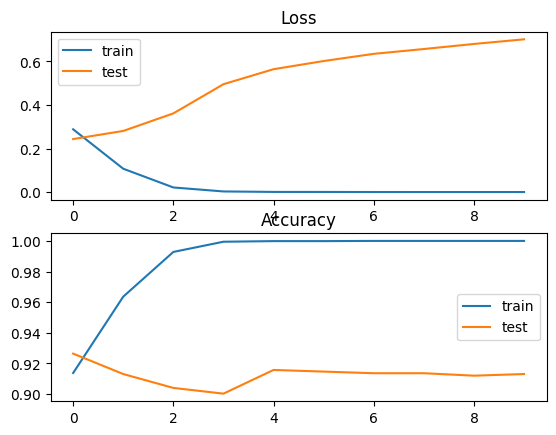

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()